#Representación de textos (documentos)
El objetivo de este notebook es mostrar mecanismos que permitan representar diferentes elementos del lenguaje natural, particularmente los textos/documentos y a partir de ellos derivar aplicaciónes de procesamiento del lenguaje natural
## El corpus
Una primera etapa de representación implica tener una colección de documentos sobre la cual hacer la representación. Por ello es importante distinguir y obtener la colección de documentos.

In [1]:
import sklearn
import os, re, string, collections, random
import spacy
import nltk
import numpy as np 
import matplotlib
import pandas as pd

Vamos a mostrar primero la capacidad de NLTK de crear un corpus

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from nltk.corpus import PlaintextCorpusReader
corpus_root="/content/drive/My Drive/corpus/libros"
corpusesp=PlaintextCorpusReader(corpus_root,".*", encoding="UTF-8")
"""para ver que archivos quedaron"""
corpusesp.fileids()


['candido-de-voltaire.txt',
 'cuentos_allan_poe.txt',
 'el-buscon.txt',
 'elquijote.txt',
 'fabulas_samaniego.txt',
 'juan_tenorio.txt',
 'libro_cocina.txt',
 'milyuna_t1.txt',
 'nuevo_testamento_valera.txt',
 'obras-escogidas_becquer.txt',
 'odisea.txt',
 'relacionhistoricasucesosdetupacamaru.txt',
 'tradiciones_peruanas_ricardo_palma.txt']

Ahora veamos una de sus capacidades: ver las frecuencias en diferentes documentos y compararlas. Resulta evidente que podemos entender características de un documento a partir de su comparación con otros documentos

In [4]:
condf=nltk.ConditionalFreqDist(
        (libro,palabra)
        for libro in corpusesp.fileids()
        for palabra in corpusesp.words(libro))

condf.tabulate(samples=["hombre","mujer"])


                                         hombre  mujer 
                 candido-de-voltaire.txt     47      0 
                   cuentos_allan_poe.txt     36     26 
                           el-buscon.txt     57     22 
                           elquijote.txt    258    222 
                   fabulas_samaniego.txt     53      9 
                        juan_tenorio.txt     46      8 
                        libro_cocina.txt     11      1 
                          milyuna_t1.txt     46     51 
             nuevo_testamento_valera.txt     65     20 
             obras-escogidas_becquer.txt     42     72 
                              odisea.txt    118     97 
relacionhistoricasucesosdetupacamaru.txt      5      0 
  tradiciones_peruanas_ricardo_palma.txt     37     33 


Ello lleva a pensar que comparando los documentos podemos obtener un resumen (Wordcloud) del documento que, en el fondo, es la representación del documento.
Para ello vamos a crear nuestro propio corpus de manera iterativa con archivos de texto

In [5]:
os.chdir("/content/drive/My Drive/corpus/libros")
documents = []
for f in os.listdir():
    if f[-4:] == '.txt':
        documents.append(f[:-4])



In [6]:
documents

['milyuna_t1',
 'relacionhistoricasucesosdetupacamaru',
 'tradiciones_peruanas_ricardo_palma',
 'elquijote',
 'cuentos_allan_poe',
 'juan_tenorio',
 'libro_cocina',
 'obras-escogidas_becquer',
 'candido-de-voltaire',
 'el-buscon',
 'nuevo_testamento_valera',
 'fabulas_samaniego',
 'odisea']

In [7]:
len(documents)

13

In [8]:
contents = []
for document in documents:
    with open(document+'.txt', 'r', encoding="UTF-8") as f:
        contents.append(f.read())
len(contents)


13

In [9]:
for i in range(0,len(contents)):
    inicio=contents[i].find("EBOOK")
    final=contents[i].find("END OF")
    contents[i]=contents[i][inicio+4:final]

In [10]:
for i in range(len(contents)):
    contents[i] = re.sub("\""," ",contents[i])
    contents[i] = re.sub ("\n|\t"," ",contents[i])
    contents[i]=contents[i].lower()


## Representación de textos y palabras: One-hot encoding, TF y TF-IDF
Vamos a utilizar tres técnicas básicas para representar semánticamente textos en un corpus: One hot encoding (cada palabra del vocabulario en el texto tiene 1, de resto tiene 0), TF (cada palabra del vocabulario en el texto tiene *el conteo de su frecuencia*, de resto tiene 0) y una técnica denominada TF-IDF para encontrar las palabras más relevantes de un texto a partir de su comparación con otros textos. En particular TF-IDF relaciona la frecuencia de los términos en el texto (documento) y la frecuencia de los mismos términos en la colección de documentos. A mayor frecuencia del término/palabra (TF=Term frequency), mayor importancia; a mayor porcentaje de documentos con el término/palabra, **menor** importancia (por eso se llama IDF: Inverse Document Frequency)
Cargamos las librerías necesarias para hacerlo de forma automática

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Al crear la representación puede ser necesario definir una frecuencia máxima de documentos (max_df) para evitar stopwords, una frecuencia mínima de documentos (min_df) para usar palabras compartidas, y un número máximo de palabras (max_features) puesto que la dimensionalidad del lenguaje (número de palabras) puede ser alta y costosa computacionalmente. Nótese que se establece *binary=True* para que la representación sea de unos y ceros (*one-hot encoding*)

In [12]:
libros_onehot=CountVectorizer(max_df=0.9,min_df=2,max_features=1000, binary=True)
oh_dfm=libros_onehot.fit_transform(contents)
vocabulario=libros_onehot.get_feature_names_out()
print(vocabulario[0:100])

['abrigo' 'abrió' 'acababa' 'acaso' 'acto' 'acuerdo' 'acá' 'admirado'
 'adónde' 'afecto' 'agradable' 'ah' 'ahí' 'aire' 'alas' 'alcance'
 'alcanza' 'alcanzar' 'alegre' 'alegres' 'alguien' 'algún' 'aliento'
 'alrededor' 'alta' 'altas' 'amada' 'amado' 'amantes' 'ambos' 'amistad'
 'amo' 'ancho' 'andaba' 'andar' 'animal' 'animales' 'anterior' 'antiguo'
 'antiguos' 'antojo' 'apariencia' 'aposento' 'aquello' 'aquél' 'ardiente'
 'armas' 'arriba' 'arrojó' 'arte' 'asiento' 'asistir' 'aspecto' 'asunto'
 'atado' 'atento' 'atrás' 'autor' 'autores' 'ave' 'aves' 'ay' 'ayer'
 'ayuda' 'azul' 'añadió' 'aún' 'baja' 'barba' 'bastante' 'batalla' 'beber'
 'bienes' 'blanca' 'blancas' 'blanco' 'bolsa' 'bondad' 'brazo' 'brazos'
 'breve' 'bueno' 'buscando' 'buscar' 'caballero' 'caballeros' 'caballo'
 'caballos' 'cabe' 'cabellos' 'cabezas' 'cabo' 'cadáver' 'caja' 'calidad'
 'calles' 'calor' 'cama' 'caminar' 'camino']


Notese que las restricciones puestas fueron una manera **elegante** de reducir el vocabulario, descartando palabras. De hecho, creamos un conjunto de "stopwords" para el corpus que se está usando. Miremos esos stopwords:

In [13]:
len(libros_onehot.stop_words_)

59985

In [14]:
print(libros_onehot.stop_words_)

{'project', 'puntiagudo', 'ignorantón', 'anhela', 'descalzarse', 'lucirá', 'reducidas', 'laberinto', 'titiriteros', 'enjaguaduras', 'δολίος', '1527', 'congregaban', 'destruirse', '_pasiego_', 'ocultando', 'revestido', 'incorporado', '_sorbetes_', 'picadas', '_pavón_', '414', 'condenó', '_argonautas_', 'bienvenido', 'eminencia', 'abultada', '_camiseta_', 'delantal', 'viles', '_pío', 'incredible', 'efectúan', 'deshacedor', 'pasaré', 'penas', 'rapas', 'empujar', 'laguardia', 'activas', 'ella', 'reponerla', '_lebratón_', 'comisionáron', 'tagarotes', 'plantadas', 'josafat', 'acelerando', 'incites', 'kamaralzamán', 'cabales', 'compromisos', 'ponían', 'envenenamiento', 'quererse', 'afianzada', 'arregla', 'remangado', 'derribóse', 'desmesuradamente', 'desgarrada', 'techos', 'derretirla', 'gobernase', 'protejo', 'ocultó', 'descansan', 'doblados', 'animadversión', 'sencillez', 'malhumorada', 'herir', 'creian', 'habitantes', 'persiguiera', 'deshacía', '_folk', 'reinando', '_tradiciones_', 'murmur

La reprsentación se da inicialmente en una matriz dispersa por motivos de ahorro de espacio

In [15]:
print(oh_dfm[0:30])

  (0, 647)	1
  (0, 780)	1
  (0, 669)	1
  (0, 285)	1
  (0, 496)	1
  (0, 540)	1
  (0, 352)	1
  (0, 842)	1
  (0, 626)	1
  (0, 642)	1
  (0, 494)	1
  (0, 495)	1
  (0, 294)	1
  (0, 465)	1
  (0, 513)	1
  (0, 975)	1
  (0, 36)	1
  (0, 60)	1
  (0, 384)	1
  (0, 760)	1
  (0, 136)	1
  (0, 86)	1
  (0, 569)	1
  (0, 19)	1
  (0, 369)	1
  :	:
  (12, 850)	1
  (12, 594)	1
  (12, 470)	1
  (12, 719)	1
  (12, 826)	1
  (12, 500)	1
  (12, 713)	1
  (12, 599)	1
  (12, 773)	1
  (12, 463)	1
  (12, 187)	1
  (12, 856)	1
  (12, 848)	1
  (12, 269)	1
  (12, 167)	1
  (12, 578)	1
  (12, 743)	1
  (12, 799)	1
  (12, 441)	1
  (12, 621)	1
  (12, 326)	1
  (12, 672)	1
  (12, 543)	1
  (12, 305)	1
  (12, 739)	1


In [16]:
denso_oh=oh_dfm.todense()
listadensa_oh=denso_oh.tolist()
dfm_oh_base=pd.DataFrame(listadensa_oh,columns=vocabulario)
dfm_oh=dfm_oh_base.transpose()
dfm_oh.columns=documents
display(dfm_oh)


,milyuna_t1,relacionhistoricasucesosdetupacamaru,tradiciones_peruanas_ricardo_palma,elquijote,cuentos_allan_poe,juan_tenorio,libro_cocina,obras-escogidas_becquer,candido-de-voltaire,el-buscon,nuevo_testamento_valera,fabulas_samaniego,odisea
abrigo,1,1,1,1,1,0,1,1,0,1,0,1,1
abrió,1,0,1,1,1,0,0,1,1,1,1,1,1
acababa,1,1,1,1,1,1,0,1,1,1,0,0,1
acaso,1,0,1,1,1,1,0,1,1,1,0,1,1
acto,1,1,1,1,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ánimo,1,1,1,1,1,0,0,1,1,1,1,1,1
ésta,1,0,1,1,1,1,1,1,0,1,1,1,1
éstos,1,0,1,1,1,1,1,1,0,1,1,1,1
última,1,1,1,1,1,1,1,1,1,0,0,1,1


Para representar frecuencias de términos, basta con eliminar el elemento *binary=True*

In [17]:
libros_TF=CountVectorizer(max_df=0.9,min_df=2,max_features=1000)
tf_dfm=libros_TF.fit_transform(contents)
vocabularioTF=libros_TF.get_feature_names_out()
denso_tf=tf_dfm.todense()
listadensa_tf=denso_tf.tolist()
dfm_tf_base=pd.DataFrame(listadensa_tf,columns=vocabularioTF)
dfm_tf=dfm_tf_base.transpose()
dfm_tf.columns=documents
display(dfm_tf)

,milyuna_t1,relacionhistoricasucesosdetupacamaru,tradiciones_peruanas_ricardo_palma,elquijote,cuentos_allan_poe,juan_tenorio,libro_cocina,obras-escogidas_becquer,candido-de-voltaire,el-buscon,nuevo_testamento_valera,fabulas_samaniego,odisea
10,3,14,6,1,1,0,17,0,0,0,40,6,17
11,3,8,2,0,1,0,7,0,0,0,39,8,12
12,4,5,1,0,1,0,10,0,0,0,39,4,8
14,3,4,2,0,0,0,7,0,0,0,39,3,24
15,3,3,1,0,0,0,16,2,0,0,38,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ítaca,0,0,0,0,0,0,0,0,0,0,0,1,175
órdenes,4,28,9,11,4,0,0,6,1,1,0,0,3
última,7,9,2,11,10,1,9,37,2,0,0,5,13
último,11,13,10,27,13,0,29,59,3,0,0,9,23


Finalmete vamos a calcular TF-IDF,cambiando la función de scikit-learn. Esta representación puede resultar mejor al tener en cuenta la frecuencia inversa en los documentos.

In [18]:
libros_tfidf=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfidf_dfm=libros_tfidf.fit_transform(contents)
vocabulariotfidf=libros_tfidf.get_feature_names_out()
denso_tfidf=tfidf_dfm.todense()
listadensa_tfidf=denso_tfidf.tolist()
dfm_tfidf_base=pd.DataFrame(listadensa_tfidf,columns=vocabulariotfidf)
dfm_tfidf=dfm_tfidf_base.transpose()
dfm_tfidf.columns=documents
display(dfm_tfidf)

,milyuna_t1,relacionhistoricasucesosdetupacamaru,tradiciones_peruanas_ricardo_palma,elquijote,cuentos_allan_poe,juan_tenorio,libro_cocina,obras-escogidas_becquer,candido-de-voltaire,el-buscon,nuevo_testamento_valera,fabulas_samaniego,odisea
10,0.003577,0.017969,0.012628,0.000143,0.002403,0.000000,0.009528,0.000000,0.000000,0.000000,0.073500,0.013002,0.004377
11,0.003859,0.011077,0.004541,0.000000,0.002593,0.000000,0.004233,0.000000,0.000000,0.000000,0.077312,0.018703,0.003333
12,0.005145,0.006923,0.002271,0.000000,0.002593,0.000000,0.006046,0.000000,0.000000,0.000000,0.077312,0.009351,0.002222
14,0.004174,0.005991,0.004912,0.000000,0.000000,0.000000,0.004578,0.000000,0.000000,0.000000,0.083628,0.007586,0.007210
15,0.003859,0.004154,0.002271,0.000000,0.000000,0.000000,0.009674,0.003693,0.000000,0.000000,0.075330,0.011689,0.004722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ítaca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004119,0.085641
órdenes,0.004769,0.035937,0.018942,0.001570,0.009613,0.000000,0.000000,0.010270,0.002572,0.002425,0.000000,0.000000,0.000772
última,0.007207,0.009975,0.003635,0.001356,0.020754,0.001656,0.004356,0.054692,0.004442,0.000000,0.000000,0.009357,0.002890
último,0.012180,0.015495,0.019546,0.003578,0.029015,0.000000,0.015094,0.093787,0.007165,0.000000,0.000000,0.018112,0.005499


Obtenemos una matriz de términos vs documentos, en donde podríamos definir numéricamente un término como su vector de TF-IDF en los documentos, y definir numéricamente un documento como su vector de términos en términos de TF-IDF. Usaremos esa potente idea de construir vectores numéricos (de términos o de documentos) más adelante como un elemento central a la hora de realizar aplicaciones de lenguaje natural.

In [19]:
dfm_tfidf.shape

(1000, 13)

In [20]:
documents

['milyuna_t1',
 'relacionhistoricasucesosdetupacamaru',
 'tradiciones_peruanas_ricardo_palma',
 'elquijote',
 'cuentos_allan_poe',
 'juan_tenorio',
 'libro_cocina',
 'obras-escogidas_becquer',
 'candido-de-voltaire',
 'el-buscon',
 'nuevo_testamento_valera',
 'fabulas_samaniego',
 'odisea']

Vamos a ordenar cada documento según sus palabras más *importantes* o *diferenciales* , las que tienen mayor TF-IDF

In [21]:
cocinatfidf=dfm_tfidf.sort_values(["libro_cocina"], ascending=False)
display(cocinatfidf)

,milyuna_t1,relacionhistoricasucesosdetupacamaru,tradiciones_peruanas_ricardo_palma,elquijote,cuentos_allan_poe,juan_tenorio,libro_cocina,obras-escogidas_becquer,candido-de-voltaire,el-buscon,nuevo_testamento_valera,fabulas_samaniego,odisea
salsa,0.000000,0.000000,0.003548,0.000481,0.000000,0.000000,0.383554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
manteca,0.010864,0.000000,0.003196,0.000217,0.000000,0.000000,0.359180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
caldo,0.000000,0.000000,0.010643,0.000000,0.000000,0.000000,0.288138,0.000000,0.000000,0.032700,0.000000,0.000000,0.000000
despues,0.000000,0.199034,0.000000,0.000000,0.000000,0.000000,0.268299,0.000000,0.112709,0.000000,0.000000,0.000000,0.000000
pimienta,0.002266,0.000000,0.000000,0.000000,0.000000,0.000000,0.237574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
azotes,0.001391,0.007489,0.002456,0.010159,0.000000,0.000000,0.000000,0.000000,0.018007,0.036788,0.000000,0.000000,0.000300
jumento,0.001811,0.000000,0.000000,0.016038,0.000000,0.000000,0.000000,0.000000,0.000000,0.003683,0.000000,0.059236,0.000000
justicia,0.012355,0.021059,0.039986,0.006162,0.000000,0.004969,0.000000,0.013303,0.015546,0.037694,0.061886,0.009357,0.002446
justo,0.004769,0.006417,0.006314,0.005280,0.000000,0.000000,0.000000,0.003423,0.000000,0.007275,0.016537,0.015169,0.005149


In [22]:
cocinatfidf["palabra"]=cocinatfidf.index
solococinatfidf=cocinatfidf[["libro_cocina","palabra"]]

#cocinafinal=cocinatfidf[[0,"palabra"]]
#cocinafinal.columns=["tf-idf","palabra"]
solococinatfidf.head(10)


,libro_cocina,palabra
salsa,0.383554,salsa
manteca,0.359180,manteca
caldo,0.288138,caldo
despues,0.268299,despues
pimienta,0.237574,pimienta
sal,0.236441,sal
cacerola,0.178980,cacerola
cocer,0.164065,cocer
sopa,0.127670,sopa
cocido,0.121712,cocido


Eso nos permite generar un wordcloud más limpio de lo que diferencia a un documento

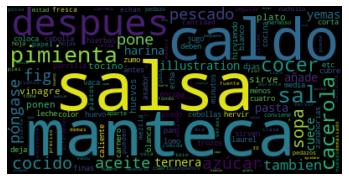

None

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##Wordcloud con las palabras del tf-idf
diccio={}
for freq,name in solococinatfidf.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figura1=plt.show()
display(figura1)

## Distancia entre vectores (términos,documentos) y sus aplicaciones: La similitud coseno
Una vez se representan los documentos (o términos) como vectores es posible calcular una distancia entre ellos.
La distancia coseno es ideal si se requiere comparar documentos más largos con otros más cortos, y también para  vectores con muchos ceros. Por eso es ideal en contextos de NLP.
Por ejemplo, podemos usarlo como motor de búsqueda:

In [24]:
busqueda="importancia del reciclaje"
#oracion0="El reciclaje de papel es importante para el bien del mundo"
oracion0="Reciclar es muy importante en el mundo"
oracion1="El quijote es un personaje de novela inigualable. Sus ocurrencias y sus andanzas son inimitables"
oracion2="El papel es un elemento que puede ser sometido a reciclaje. En el mundo cada vez hay más importancia en este tema"
oracionpoc=[busqueda,oracion0,oracion1,oracion2]


Ahora calculamos su TF, y luego su distancia coseno. 
Usamos TFIDF para poder hacer la normalización de los datos.
Quien tenga menor distancia coseno es el mejor "match" para la búsqueda; en este caso, como se calcula la similitud (1- distancia coseno), se debe buscar la mayor similitud.

In [25]:
vect = TfidfVectorizer(use_idf=False, norm="l2")
tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names_out()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()

finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1, index=["busqueda","oracion0","oracion1","oracion2"])
##aqui no traspongo

from sklearn.metrics.pairwise import cosine_similarity
buscando=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
display(buscando)

array([[0.        , 0.        , 0.23094011]])

In [26]:
finalcz1.index[np.argmax(buscando)+1]

'oracion2'

Nótese que es indispensable que haya palabras exactamente iguales. Sin embargo eso puede trabajarse (o resolverse) con representaciones de palabras.
También podemos hacer un sistema de respuesta a preguntas:

In [27]:
busqueda="¿cuál es el horario de la tienda?"
resp0="la tienda vende artículos deportivos"
resp1="La tienda tiene horario de 8 a 5"
resp2="La tienda tiene los precios más bajos"

oracionpoc=[busqueda,resp0,resp1,resp2]

tocoocz1=vect.fit_transform(oracionpoc)
nombrescoocz1=vect.get_feature_names_out()
matrizcz1=tocoocz1.todense()
matlistcz1=matrizcz1.tolist()
finalcz1=pd.DataFrame(matlistcz1,columns=nombrescoocz1,index=["busqueda","resp0","resp1","resp2"])
from sklearn.metrics.pairwise import cosine_similarity
respondiendo=cosine_similarity(finalcz1[0:1],finalcz1[1:4])
print(oracionpoc[np.argmax(respondiendo)+1])

La tienda tiene horario de 8 a 5


También podemos hacer agrupaciones de textos, clasificando los mismos en grupos. Vamos a agrupar canales de televisión según sus descripciones

In [30]:
import pandas as pd
os.chdir("/content/")
canales = pd.read_excel("canales_revisado.xlsx")
canales.head(6)


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,channel,descripcion
0,1,6.1 Multimedios Guadalajara,Además de la programación de noticieros y depo...
1,2,A&E,El canal se centró originalmente en la program...
2,3,A+,Es una red de canales de televisión mexicana d...
3,4,Adenalina,Adrenalina Sports Network (antes conocido como...
4,5,ADN40,Es un canal de televisión abierta mexicana pr...
5,6,AMC,AMC es un canal de televisión por suscripción ...


In [31]:
textocanales=canales["descripcion"].values.tolist()
len(textocanales)

119

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
misstop=stopwords.words("spanish")+["á","Y"]

def filtrado(texto):
    filtrados=[word for word in texto if word not in misstop]
    return(filtrados)    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
import os,re
nltk.download("punkt")
filtradito=[]

for i in range(len(textocanales)):
    textocanales[i] = re.sub("\""," ",textocanales[i])
    textocanales[i] = re.sub ("\n|\t"," ",textocanales[i])
    textocanales[i]=textocanales[i].lower()
    breve=nltk.tokenize.word_tokenize(textocanales[i],language="spanish")
    tempfilt=filtrado(breve)
    filtradito.append(tempfilt)
    
unidito=[]
for element in filtradito:
    unidito.append(" ".join(element))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Creamos el Tf-idf de cada descripción de canal

In [34]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
##notse que no uso max_features porque no espero un volumen grande de palabras.
vectores=TfidfVectorizer(max_df=0.9,min_df=3)
tfslimpio=vectores.fit_transform(unidito)
nombreslimpio=vectores.get_feature_names_out()
matriz=tfslimpio.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombreslimpio)
final2=finalm.transpose()
finalm.head(10)

,10,11,12,1990,1991,2012,2016,2019,24,30,...,varios,viacomcbs,vida,virtual,vivo,walt,warnermedia,wild,with,último
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158832,0.0,0.150779
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [35]:
finalm.shape

(119, 371)

In [36]:
print(nombreslimpio)

['10' '11' '12' '1990' '1991' '2012' '2016' '2019' '24' '30' 'abierta'
 'acción' 'actualidad' 'actualmente' 'además' 'adulto' 'adultos'
 'afiliadas' 'ahora' 'ambiente' 'america' 'americas' 'amplia' 'américa'
 'and' 'animadas' 'animal' 'animales' 'anteriormente' 'análisis' 'archivo'
 'argentina' 'arte' 'así' 'at' 'audiencia' 'aventuras' 'azteca' 'años'
 'bajo' 'basa' 'basada' 'belleza' 'bloque' 'box' 'broadcasting' 'busca'
 'by' 'cable' 'cadena' 'cadenas' 'calidad' 'campos' 'canal' 'canales'
 'cantidad' 'cartoon' 'casa' 'channel' 'chihuahua' 'ciencia' 'cine'
 'ciudad' 'ciudades' 'cobertura' 'colombia' 'comedia' 'comedias'
 'comercial' 'communications' 'company' 'compone' 'compuesta'
 'comunicaciones' 'conocida' 'conocido' 'consiste' 'contenido'
 'contenidos' 'corte' 'csi' 'cuenta' 'cultura' 'cultural' 'culturales'
 'debate' 'debates' 'dedicado' 'dentro' 'deporte' 'deportes' 'deportivo'
 'deportivos' 'desarrollo' 'diferentes' 'difusión' 'dirigida' 'discovery'
 'dish' 'disney' 'distintas'

Calculamos la similitud coseno entre canales

In [37]:
from sklearn.metrics.pairwise import cosine_similarity


In [38]:
similitudes=cosine_similarity(finalm[0:128],finalm[0:128])
similitudes[0:5,0:5]


array([[1.        , 0.00242243, 0.04164852, 0.0590956 , 0.10067329],
       [0.00242243, 1.        , 0.00736074, 0.26365949, 0.02113587],
       [0.04164852, 0.00736074, 1.        , 0.01463549, 0.36079617],
       [0.0590956 , 0.26365949, 0.01463549, 1.        , 0.05866491],
       [0.10067329, 0.02113587, 0.36079617, 0.05866491, 1.        ]])

para aplicar K-means debemos normalizar la distancia coseno

In [39]:
import numpy as np
finalsinceros=finalm.loc[finalm.sum(axis=1)!=0,]
length = np.sqrt((finalsinceros**2).sum(axis=1))[:,None]
finalm2 = finalsinceros / length
##corregir si lenght=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
finalsinceros.shape

(119, 371)

para aplicar k-medias miramos el gráfico de codo y así proponer un número de clusteres

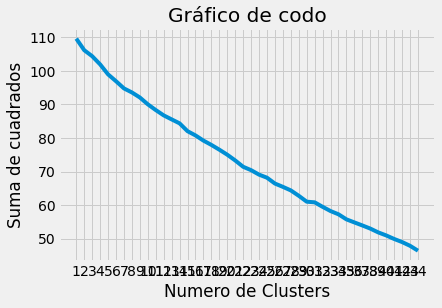

In [41]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

sse=[]
for k in range(1, 45):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(finalm2)
  sse.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 45), sse)
plt.xticks(range(1, 45))
plt.xlabel("Numero de Clusters")
plt.ylabel("Suma de cuadrados")
plt.title('Gráfico de codo')
plt.show()



No resultó tan claro el número de clusteres. Tomaremos un número que consideremos conveniente.

In [42]:
kmeans = KMeans(n_clusters=8).fit(finalm2)
centroids = kmeans.cluster_centers_
display(centroids)




array([[ 3.46944695e-18,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.73472348e-18,  0.00000000e+00],
       [ 1.73472348e-18,  8.67361738e-19,  2.72236682e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.10113554e-02],
       [ 3.10298429e-02, -8.67361738e-19, -1.73472348e-18, ...,
         0.00000000e+00,  4.46854334e-02,  2.16390859e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.34979179e-02,  0.00000000e+00, -1.73472348e-18, ...,
         1.05888104e-02,  3.46793477e-02,  1.00519509e-02],
       [ 1.57670254e-02,  8.55480734e-03,  1.83930378e-02, ...,
         2.30633186e-02, -1.73472348e-18, -1.73472348e-18]])

Extraemos los indices de las palabras más "representativas" (centroide más alto)

In [43]:

destacados=np.argsort(centroids,axis=1)[:,-4:]
display(destacados)



array([[218, 349,  53,  61],
       [242, 335, 289,  90],
       [196, 310,  16, 269],
       [ 53, 325, 201, 137],
       [337,  62,  49, 229],
       [208, 140, 173, 146],
       [310, 236, 342,  24],
       [337,  41, 325,  53]])

In [44]:
destacados.shape

(8, 4)

In [46]:
#guardo como listas los indices y las palabras
llevarlos=destacados.tolist()
paltotal=nombreslimpio.tolist()
#detecto que palabras corresponden a cada cluster
palabras_total=[]
for i in range(len(llevarlos)):
  palabras_linea=[]
  for k in range(len(llevarlos[i])):
    palabras_linea.append(paltotal[llevarlos[i][k]])
  palabras_total.append(palabras_linea)
print(palabras_total)

[['mexicano', 'transmite', 'canal', 'cine'], ['noticias', 'televisa', 'programas', 'deportes'], ['jóvenes', 'series', 'adultos', 'películas'], ['canal', 'suscripción', 'latinoamericano', 'estadounidense'], ['televisión', 'ciudad', 'cadena', 'méxico'], ['líder', 'estrellas', 'horóscopos', 'famosos'], ['series', 'network', 'the', 'and'], ['televisión', 'basada', 'suscripción', 'canal']]


Como vemos los clusteres contienen algunas palabras descriptivas útiles para la clasificación de los canales, y otras palabras que nos hablan más bien del tipo de lenguaje o redacción de los textos

Asigno los clusteres a los canales para observarlos

In [48]:
labels = pd.DataFrame(kmeans.predict(finalm2))
totalcl=pd.concat([canales,labels],axis=1)
totalcl.columns=["id","canal","descripcion","cluster"]
totalcl.sort_values(by=['cluster'], inplace=True)
display(totalcl)


,id,canal,descripcion,cluster
50,56,ESPN 3,Es un servicio de streaming de programas depor...,0
56,62,Fox Sports 2,Nace en 2009 con el nombre de Fox Sports+ para...,0
49,55,ESPN 2 (Mult09),"Canal que emite contenido deportivo, centrado ...",0
70,76,Ingenio Tv,es un canal de televisión abierta mexicano de ...,0
37,43,De Pelicula,Canal especializado en emitir cine clásico mex...,0
...,...,...,...,...
40,46,Discovery Kids,Canal enfocado a la audiencia infantil. Princi...,7
38,44,Discovery Channel,Canal temático líder en contenidos de no-ficci...,7
12,17,BITME,Canal enfocado a la programación de carácter g...,7
100,106,Telehit,Telehit Música (anteriormente conocido como Ri...,7
